# Custom Transformer

In [70]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import set_config; set_config(display='diagram')

👇 Consider the following dataset

In [71]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,days_until_delivery
0,RJ,SP,1825,53,10,40,9
1,RJ,SP,700,65,18,28,9
2,RJ,SP,1825,53,10,40,11
3,RJ,SP,1825,53,10,40,12
4,RJ,SP,1825,53,10,40,14


<AxesSubplot:>

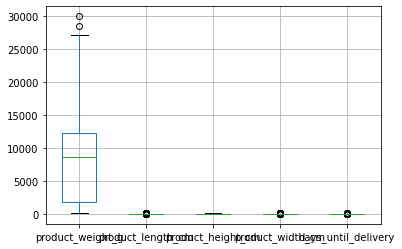

In [72]:
data.boxplot()

In [73]:
data.shape

(1000, 7)

In [74]:
#aspiration.unique

- Each observation of the dataset represents an item being delivered from a  `seller_state` to a `customer_state`. 
- Other columns describe the packaging properties of each item.

🎯 The target is the number of days between the order and the delivery.

<AxesSubplot:xlabel='days_until_delivery', ylabel='Count'>

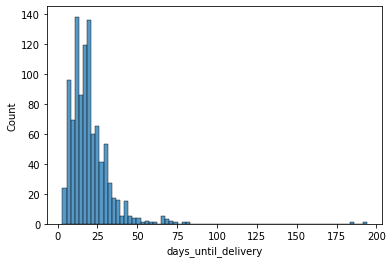

In [75]:
# Check target
sns.histplot(data.days_until_delivery)

## 1. Pipeline

👇 Create a scikit-learn pipeline named `pipe`:

- Engineer a `volume` feature from the dimensions features
- Preserve the original product dimensions features for training
- Scale all numerical features
- Encode the categorical features
- Add a default `Ridge` regression estimator

<details><summary>Hints</summary>

- There are many ways to create your preprocessed matrix (using `ColumnTransformer` and/or `FeatureUnion`). 
    
- If your transformed feature matrix look wierd, it may be stored as "sparse" by the default behavior of `OneHotEncoder(sparse=True)`. Use `.todense()` to turn it back to a dense matrix

</details>

In [76]:
X=data.drop(columns="days_until_delivery")
y=data["days_until_delivery"]

In [77]:
X

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,RJ,SP,1825,53,10,40
1,RJ,SP,700,65,18,28
2,RJ,SP,1825,53,10,40
3,RJ,SP,1825,53,10,40
4,RJ,SP,1825,53,10,40
...,...,...,...,...,...,...
995,RJ,SP,16800,63,58,24
996,RS,SP,675,40,18,35
997,RJ,SP,2050,45,15,35
998,BA,SP,8750,52,51,17


In [78]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [84]:
from sklearn.compose import make_column_selector
from sklearn.pipeline import FeatureUnion,make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [113]:
#left chile_pipeline1

#num,scale
num_transformer=StandardScaler()

#category
cat_transform=OneHotEncoder(handle_unknown="ignore")

#columns transformer : pass throug columnsb
#concatinate columns
preprocessor=ColumnTransformer([
    ("num_tr",num_transformer,make_column_selector(dtype_include='int64')),
    ("cat_tr",cat_transform,["customer_state","seller_state"])
])

vol_cal_constructor=FunctionTransformer\
(lambda data: pd.DataFrame(data["product_length_cm"]*data["product_height_cm"]*data["product_width_cm"]))

vol_cal_scale=Pipeline([
     ("volume_cal",vol_cal_constructor),
    ("scaler",StandardScaler()),
])

#vol cal fuction
#make function

pre_proc=FeatureUnion([
    ("left_child",preprocessor),
    ("volume_cal",vol_cal_scale)
])

pre_proc


FeatureUnion(transformer_list=[('left_child',
                                ColumnTransformer(transformers=[('num_tr',
                                                                 StandardScaler(),
                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x17bdd52b0>),
                                                                ('cat_tr',
                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                 ['customer_state',
                                                                  'seller_state'])])),
                               ('volume_cal',
                                Pipeline(steps=[('volume_cal',
                                                 FunctionTransformer(func=<function <lambda> at 0x17be4c310>)),
                                                ('scaler',
                                                 StandardScaler())]))])

In [100]:
data.shape

(1000, 7)

In [110]:

pre_proc.fit_transform(X)


<1000x32 sparse matrix of type '<class 'numpy.float64'>'
	with 7000 stored elements in Compressed Sparse Row format>

In [111]:
#makefull pipeline
from sklearn.linear_model import Ridge
pipe=make_pipeline(pre_proc,Ridge())

#### 🧪 Test your pipe

In [105]:
from nbresult import ChallengeResult

pipe_test = pipe

# Check that it doesn't crash
assert pipe_test.fit(X,y)

result = ChallengeResult('pipe', 
                         shape = pipe_test[:-1].fit_transform(X).shape
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/08-Workflow/02-Custom-Transformer
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_pipe.py::TestPipe::test_pipe_not_crashing PASSED              [100%]

============================== 1 passed in 1.18s ===============================


💯 You can commit your code:

git add tests/pipe.pickle

git commit -m 'Completed pipe step'

git push origin master


## 2. Train and Predict

👇 Let's imagine `data` is your entire training set.

- `cross_validate` your pipeline on this dataset (❗️low r2 score are expected)
- Now, imagine you just received an new order `new_data`: predict it's duration of delivery in a variable `prediction`

In [106]:
new_data = pd.read_csv("data_new.csv")
new_data

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,RJ,SP,1825,53,10,40


In [108]:
# YOUR CODE HERE
prediction=pipe.predict(new_data)

In [109]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
    prediction = prediction
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/08-Workflow/02-Custom-Transformer
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.53s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


🏁 Congratulation. Don't forget to add, commit and push your notebook.